## Feature Engineering with Pandas

This notebook is a modified version of the original from Aurelion Geron. The source code can be found here: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

In [3]:
# Find the data
filepath = Path.joinpath(Path.cwd().parent, 'data', 'housing.csv')

In [4]:
# Read in the data
housing = pd.read_csv(filepath)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### What is the story of one row?
"In this chapter we chose the California Housing Prices dataset from the StatLib repository2 (see Figure 2-1). This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes." 

"Each row represents one district. There are 10 attributes (you can see the first 6 in the screenshot): longitude, latitude, housing_median_age, total_rooms, total_bed rooms, population, households, median_income, median_house_value, and ocean_proximity."  
-- Ageron, pg. 38

## Basic EDA

In [5]:
# How many districts are there?
housing.shape

(20640, 10)

In [6]:
# Get some basic info about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Any missing data?
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Get rid of all the missing data.
print(housing.shape)
housing.dropna(inplace=True)
print(housing.shape)

(20640, 10)
(20433, 10)


In [9]:
# Describe the categorical variable about "proximity"
housing["ocean_proximity"].value_counts(dropna=False)

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Describe the 9 continuous variables
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


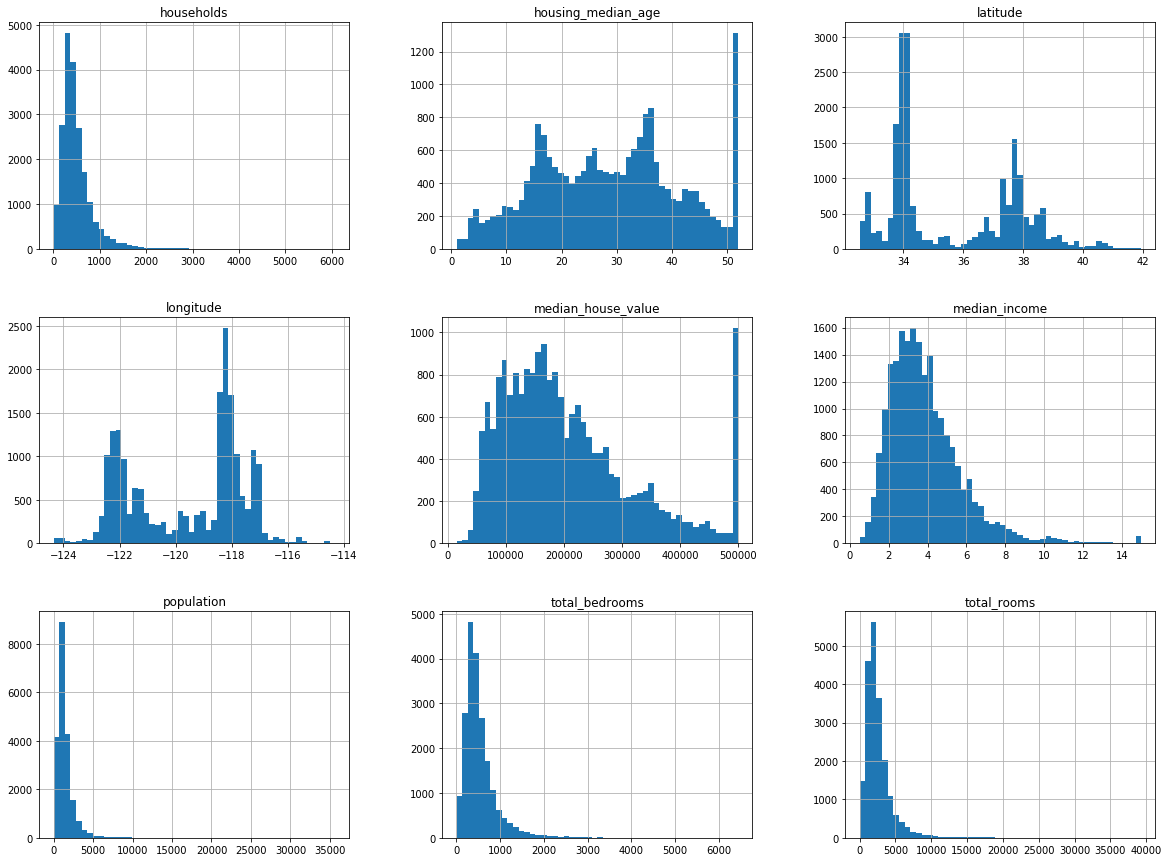

In [11]:
# Histograms to describe the same 9 continuous variables
housing.hist(bins=50, figsize=(20,15))
plt.show()

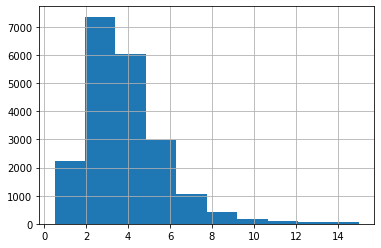

In [12]:
# Histogram of just one variable
housing["median_income"].hist();

## How to bin a continuous variable

In [13]:
# Create a categorical variable from the continuous variable
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
# Display its frequencies
income_cats = housing["income_cat"].value_counts().sort_index()
income_cats

1     814
2    6515
3    7156
4    3611
5    2337
Name: income_cat, dtype: int64

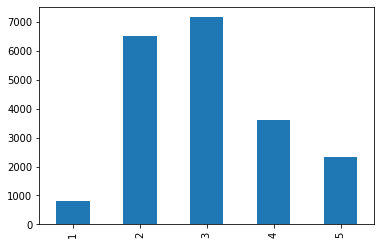

In [15]:
# Same thing but as a bar chart
income_cats.plot.bar();

In [16]:
# Same thing but with plotly (just because we can and it looks cool)
mydata = [go.Bar(x = income_cats.index,
                 y = income_cats.values,
                 marker = dict(color=['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F']))]

mylayout = go.Layout(title = 'Median Income in California',
                     xaxis = dict(title='Median income categories'),
                     yaxis = dict(title='Number of districts'))
    
fig = go.Figure(data=mydata, layout=mylayout)
fig

## Create some additional features

In [17]:
# Simple arithmetic combinations based on population & household
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [18]:
# Correlation will show which features are strong predictors
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

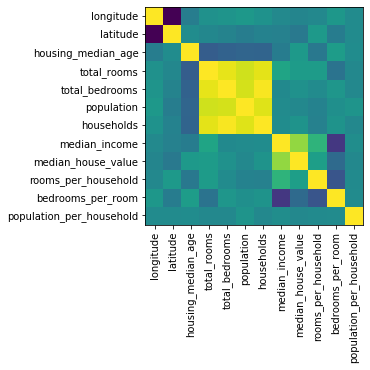

In [19]:
# Display the correlation matrix using matplotlib
# add some labels
fig, axes = plt.subplots()
im = axes.imshow(corr_matrix)
# set the tick distance
axes.set_xticks(np.arange(len(corr_matrix)))
axes.set_yticks(np.arange(len(corr_matrix)))
# set the labels
axes.set_xticklabels(corr_matrix.index)
axes.set_yticklabels(corr_matrix.index)
plt.xticks(rotation=90)
# display
plt.show;

## One-hot Encoding
"One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEn coder class to convert categorical values into one-hot vectors" 
-- Ageron, pg. 70

In [20]:
# Remember the proximity variable?
print(housing["ocean_proximity"].head(3))
print(housing["ocean_proximity"].tail(3))

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
Name: ocean_proximity, dtype: object
20637    INLAND
20638    INLAND
20639    INLAND
Name: ocean_proximity, dtype: object


In [21]:
# And the categories for that?
prox_cats = list(housing["ocean_proximity"].value_counts().index)
prox_cats

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [22]:
# Import the encoder
from sklearn.preprocessing import OneHotEncoder
# Instantiate the encoder
cat_encoder = OneHotEncoder(sparse=False)
# Fit the encoder to our data (notice the double brackets!)
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
# display the results (top 3, bottom 3)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [23]:
# Convert those results into their own dataframe
onehotdf = pd.DataFrame(housing_cat_1hot, columns=prox_cats)
onehotdf.head(3)

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


Quick tip: read up on merging here!  
* https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
* https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [24]:
# Compare the indices to make sure they match (they do!)
print(housing.index)
print(onehotdf.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20630, 20631, 20632, 20633, 20634, 20635, 20636, 20637, 20638,
            20639],
           dtype='int64', length=20433)
RangeIndex(start=0, stop=20433, step=1)


In [25]:
# Merge that sub-dataframe back into the original housing dataframe
housing2 = pd.concat([housing, onehotdf], axis=1)
# Display a sample of those results 
housing2.iloc[:,9:].sample(5)

,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
3831,<1H OCEAN,3,4.493373,0.227466,2.860088,1.0,0.0,0.0,0.0,0.0
19060,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
15511,<1H OCEAN,4,5.986111,0.175870,3.216667,0.0,0.0,0.0,1.0,0.0
13408,INLAND,3,5.689655,0.198788,3.875862,0.0,1.0,0.0,0.0,0.0
11569,<1H OCEAN,4,5.253788,0.171593,3.371212,1.0,0.0,0.0,0.0,0.0


## Feature Scaling

"One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the hous‐ ing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.
There are two common ways to get all attributes to have the same scale: min-max scaling (i.e., normalization) and standardization."  -- Geron, pg. 72

#### Normalization
"Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐ ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason."  -- Geron, pg. 73

#### Standardization
"Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algo‐ rithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization."  -- Geron, pg. 73

In [26]:
# What are the numeric variables in my dataset?
housing2.describe().columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', '<1H OCEAN', 'INLAND', 'NEAR OCEAN',
       'NEAR BAY', 'ISLAND'],
      dtype='object')

In [27]:
# Keep just the ones we want to scale
numeric_cols = ['housing_median_age', 'total_rooms',  'bedrooms_per_room',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

#### Important note:
The following code only works because we dropped missing data earlier. This is pretty common in `sklearn` -- either drop or impute missing values at the start of your analysis!

In [28]:
# Import the encoder
from sklearn.preprocessing import StandardScaler
# Instantiate the encoder
std_scaler = StandardScaler()
# Fit the encoder to our data (notice the double brackets!)
scaled_results = std_scaler.fit_transform(housing[numeric_cols])
# display the results (top 3, bottom 3)
scaled_results[:2]

array([[ 0.98216331, -0.8038126 , -1.1460242 , -0.97032521, -0.97331952,
        -0.97683327,  2.34516291,  2.12881864,  0.62539465, -1.1460242 ,
        -0.04943252],
       [-0.60621017,  2.0421302 , -0.98725423,  1.34827594,  0.86133924,
         1.67037262,  2.33263161,  1.31362603,  0.3249418 , -0.98725423,
        -0.09213353]])

In [29]:
# Convert those results into their own dataframe
scaled_df = pd.DataFrame(scaled_results, columns=numeric_cols)
scaled_df.head()

,housing_median_age,total_rooms,bedrooms_per_room,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.982163,-0.803813,-1.146024,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0.625395,-1.146024,-0.049433
1,-0.606210,2.042130,-0.987254,1.348276,0.861339,1.670373,2.332632,1.313626,0.324942,-0.987254,-0.092134
2,1.855769,-0.535189,-1.440514,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.150594,-1.440514,-0.025797
3,1.855769,-0.623510,-0.492925,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0.155467,-0.492925,-0.050162
4,1.855769,-0.461970,-0.706141,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0.342549,-0.706141,-0.085272


In [30]:
# Drop the original numeric columns
housing3 = housing2.drop(numeric_cols, axis=1)
housing3.columns

Index(['longitude', 'latitude', 'ocean_proximity', 'income_cat', '<1H OCEAN',
       'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype='object')

In [31]:
# Merge that sub-dataframe back into the updated original housing dataframe
housing4 = pd.concat([housing3, scaled_df], axis=1)
# Display a sample of those results 
housing4.sample(5)

,longitude,latitude,ocean_proximity,income_cat,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,housing_median_age,total_rooms,bedrooms_per_room,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
10801,-117.95,33.63,<1H OCEAN,5,1.0,0.0,0.0,0.0,0.0,-0.209117,-0.021739,3.007342,1.103838,3.822032,1.264921,-0.880330,-0.312428,-1.126742,3.007342,0.266719
8693,-118.33,33.86,<1H OCEAN,5,1.0,0.0,0.0,0.0,0.0,0.743907,-0.473868,0.117689,-0.441105,-0.630038,-0.511218,-0.250290,0.373686,-0.066413,0.117689,-0.070197
5976,-117.77,34.11,INLAND,3,0.0,1.0,0.0,0.0,0.0,0.346814,-0.737458,0.717392,-0.657065,-0.503845,-0.602772,-0.848528,-0.757708,-0.652843,0.717392,0.009886
13393,-117.59,34.03,INLAND,4,0.0,1.0,0.0,0.0,0.0,-1.876909,3.035167,-0.687826,2.532495,3.080756,2.666999,0.297770,-0.638158,0.270128,-0.687826,0.015789
18626,-121.95,37.11,<1H OCEAN,5,0.0,1.0,0.0,0.0,0.0,-1.638653,-0.103195,-0.362226,-0.177682,-0.563853,-0.529529,-0.905550,-1.095567,1.082008,-0.362226,-0.040723


In [32]:
# Confirm that our scaling did what we expected it to do (mean of zero, std dev=1)
print(housing4[numeric_cols].mean())
print('\n')
print(housing4[numeric_cols].std())

housing_median_age         -7.584704e-16
total_rooms                 2.192776e-16
bedrooms_per_room           2.694626e-16
bedrooms_per_room           2.694626e-16
total_bedrooms              2.035816e-16
population                 -2.316367e-16
households                  1.299940e-16
median_income               3.832505e-16
median_house_value         -1.025841e-16
rooms_per_household        -1.444525e-16
bedrooms_per_room           2.694626e-16
bedrooms_per_room           2.694626e-16
population_per_household    5.517699e-18
dtype: float64


housing_median_age          1.000024
total_rooms                 1.000024
bedrooms_per_room           1.000024
bedrooms_per_room           1.000024
total_bedrooms              1.000024
population                  1.000024
households                  1.000024
median_income               1.000024
median_house_value          1.000024
rooms_per_household         1.000024
bedrooms_per_room           1.000024
bedrooms_per_room           1.000024
popula

## Using the pandas `.apply` method

In [33]:
# Let's create a few more features in a new way.
housing4.head()

,longitude,latitude,ocean_proximity,income_cat,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,housing_median_age,total_rooms,bedrooms_per_room,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0,0.982163,-0.803813,-1.146024,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0.625395,-1.146024,-0.049433
1,-122.22,37.86,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0,-0.606210,2.042130,-0.987254,1.348276,0.861339,1.670373,2.332632,1.313626,0.324942,-0.987254,-0.092134
2,-122.24,37.85,NEAR BAY,5,0.0,0.0,0.0,1.0,0.0,1.855769,-0.535189,-1.440514,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.150594,-1.440514,-0.025797
3,-122.25,37.85,NEAR BAY,4,0.0,0.0,0.0,1.0,0.0,1.855769,-0.623510,-0.492925,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0.155467,-0.492925,-0.050162
4,-122.25,37.85,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0,1.855769,-0.461970,-0.706141,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0.342549,-0.706141,-0.085272


In [34]:
# What's the longitude and latitude of San Francisco and Los Angeles?
sanfran = (-122.4194, 37.7749)
losangeles = (-118.2437, 34.0522)

In [35]:
# Indicate if a district is South of Los Angeles
housing4['south_of_la']=housing4['latitude'].apply(lambda x: x < 37.8)
housing4['south_of_la'].value_counts()

True     16203
False     4435
Name: south_of_la, dtype: int64

In [36]:
# Indicate if a district is between Los Angeles and SF
housing4['between_cities']=housing4['latitude'].apply(lambda x: (x > 34.05) & (x < 37.77))
housing4['between_cities'].value_counts()

False    12041
True      8597
Name: between_cities, dtype: int64

In [46]:
# Is it near San Francisco?
def near_sf(df):
    if (df['latitude'] > 37.5) & (df['latitude'] < 37.9) & (df['longitude'] < -122.3) & (df['longitude'] > -122.5):
        return True
    else:
        return False
                                                                       

housing4['near_sf']=housing4.apply(lambda x: near_sf(x), axis=1 )  
housing4['near_sf'].value_counts()

False    19871
True       767
Name: near_sf, dtype: int64

#### Create a variable to measure ocean proximity

In [47]:
# Check the counts
housing4['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
# Recode the values
housing4['ocean_proximity2']=housing4['ocean_proximity'].apply(lambda x: 'KINDA NEAR' if x=='<1H OCEAN' else x)
housing4['ocean_proximity2'].value_counts()

KINDA NEAR    9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity2, dtype: int64